In [71]:
# pip install github3.py command for install github3
# execute pip install github3.py command from the the command window/terminal
import github3, json
import os
#import cPickle as pickle
import pandas as pd                                    # panda's nickname is pd
from fbprophet import Prophet
import numpy as np                                     # numpy as np
from pandas import DataFrame, Series                   # for convenience
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# Get an API key for GitHub and set it as GITHUB_TOKEN
# Here is the URL to generate your GITHUB_TOKEN
# https://help.github.com/articles/creating-an-access-token-for-command-line-use/

GITHUB_TOKEN = 'd14e9f79e44f66bdc12e09bee463a3bd1225c98f'
ORG = 'SPM587SP19'                     
REPO = 'SCM587SP19'
FILENAME_ISSUES = ORG + '_commits1.json'

In [73]:
gh = github3.login(token=GITHUB_TOKEN)

f = open(FILENAME_ISSUES, 'w')

repo = gh.repository('RSP19SCM71C' , 'SCM587SP19' )
repostats = repo.contributors()
for i in repo.commits():
    item = i.as_json()
    item = json.loads(item)
    data['commit_count'] = 1
    data['created_at']= item["commit"]["committer"]["date"][0:10]
    out=json.dumps(data)                                                  # save this all information to a JSON file
    f.write(out+ '\n')
f.close()

INFO:github3:Building a url from ('https://api.github.com', 'repos', 'RSP19SCM71C', 'SCM587SP19')
INFO:github3:JSON was returned
INFO:github3:Building a url from ('https://api.github.com/repos/RSP19SCM71C/SCM587SP19', 'contributors')
INFO:github3:Building a url from ('https://api.github.com/repos/RSP19SCM71C/SCM587SP19', 'commits')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned


In [74]:
import json
listOfPulls = [json.loads(line) for line in open('SPM587SP19_commits1.json')]
commits_dataframe = DataFrame(listOfPulls)
commits_dataframe.head()

,commit_count,created_at
0,1,2019-04-09
1,1,2019-04-09
2,1,2019-04-09
3,1,2019-04-09
4,1,2019-04-09


In [75]:
commits_dataframe['created_at'] = pd.to_datetime(commits_dataframe['created_at'], errors='coerce')
c = commits_dataframe.groupby(commits_dataframe['created_at'].dt.date).sum().reset_index()
c= c.rename(index=str, columns={'created_at': 'ds',
                        'commit_count': 'y'})
#pull_dataframe_created = pull_dataframe_created.rename(index=str, columns={"created_at": "ds", "PullCount": "y"})
p = p[['ds', 'y']]
p.head()

,ds,y
0,2019-03-24,3
1,2019-03-27,1
2,2019-03-28,15
3,2019-03-29,27
4,2019-04-01,2


In [76]:
com = Prophet()
com.fit(p)
future = com.make_future_dataframe(periods=30)
future.tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.0.


,ds
38,2019-05-05
39,2019-05-06
40,2019-05-07
41,2019-05-08
42,2019-05-09


In [77]:
forecast = com.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
38,2019-05-05,68.898615,45.055098,91.227318
39,2019-05-06,63.312900,41.836262,87.017665
40,2019-05-07,110.440932,87.497014,131.776233
41,2019-05-08,99.696888,76.871545,122.194540
42,2019-05-09,98.688441,76.342140,121.760923


## Plot the commits forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

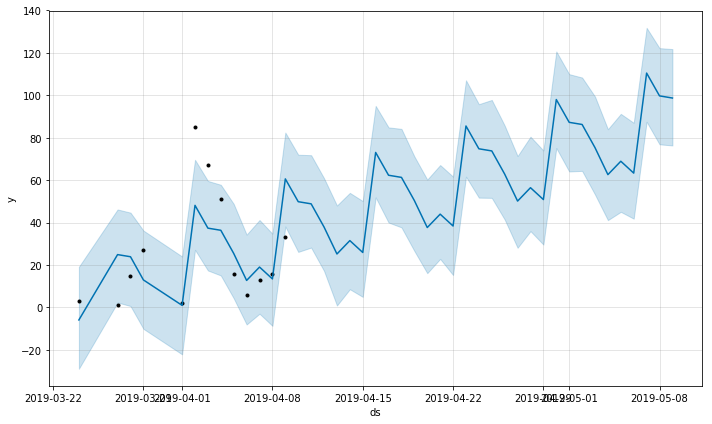

In [78]:
fig1 = com.plot(forecast)

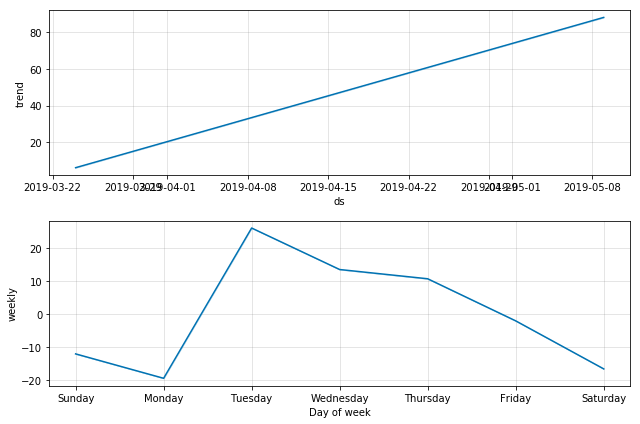

In [79]:
fig1 = com.plot_components(forecast)